In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import numpy as np
import seaborn as sns
from IPython.display import display

In [3]:
df = pd.read_csv('data/toyData_wind.csv')
display(df)

,Wind (knots),Gefühlte Temperatur (C)
0,0.000000,26.948631
1,0.303030,25.555810
2,0.606061,27.412000
3,0.909091,26.051728
4,1.212121,27.289022
...,...,...
95,28.787879,17.461299
96,29.090909,16.029515
97,29.393939,16.633243
98,29.696970,15.830765


<AxesSubplot:xlabel='Wind (knots)', ylabel='Gefühlte Temperatur (C)'>

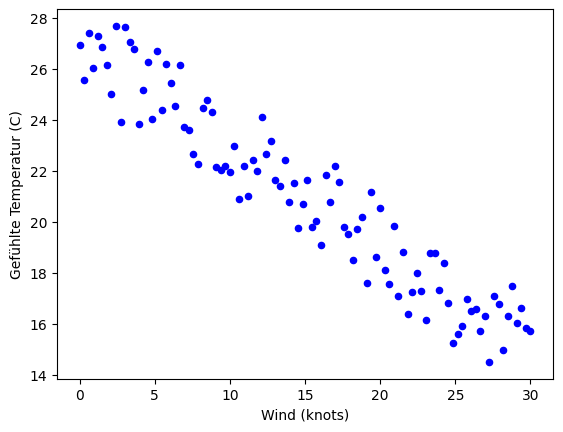

In [4]:
df.plot.scatter('Wind (knots)', 'Gefühlte Temperatur (C)', c="b")

In [5]:
from sklearn.model_selection import train_test_split

df_data = df.drop('Gefühlte Temperatur (C)', axis=1)
df_target = pd.DataFrame(df['Gefühlte Temperatur (C)'], columns=['Gefühlte Temperatur (C)'])


In [7]:
x_train, x_test, y_train, y_test = train_test_split(df_data, df_target, test_size=0.2, random_state=42)

In [8]:
from sklearn import linear_model

lm = linear_model.LinearRegression()
model = lm.fit(x_train, y_train)

In [9]:
predictions = lm.predict(x_train)
y_train_pred = pd.DataFrame(predictions, columns=['Vorhergesagte Gefühlte Temperatur (C)'])

In [10]:
display(y_train_pred)

,Vorhergesagte Gefühlte Temperatur (C)
0,20.400074
1,16.542369
2,23.790179
3,21.919776
4,18.763472
...,...
75,19.815573
76,18.529672
77,25.192981
78,16.074768


In [13]:
from sklearn.metrics import mean_squared_error
from math import sqrt

predictions = lm.predict(x_test)
y_pred = pd.DataFrame(predictions, columns=['Vorhergesagte Gefühlte Temperatur (C)'])
# Mean Squred Error
mse = mean_squared_error(y_test, y_pred)
print('Mean squared error(Testing) :', round(mse, 4))

# Root Mean Squared Error
rmsq = sqrt(mean_squared_error(y_test, y_pred))
print('Root mean squared error(Testing) :', round(rmsq, 4))

# Accuracy
score = lm.score(x_test, y_test)
print('Explained variance of the predictions(Testing) :', round(score * 100, 4))

Mean squared error(Testing) : 1.5902
Root mean squared error(Testing) : 1.261
Explained variance of the predictions(Testing) : 90.4832


In [96]:

x = np.arange(10)
y = np.arange(10)
yerr = np.random.random(10)
xerr = np.random.random(10)

#plt.subplot(122)
#plt.scatter(x, y, label = 'blah')
#plt.errorbar(x, y, yerr = yerr, xerr = None, ls='none') 

(10,)

In [111]:
y_test.reset_index(inplace=True, drop=True)
yerr = y_test.iloc[:, 0] - y_pred.iloc[:, 0]

In [114]:
yerr

0    -1.546455
1    -1.537937
2    -1.575931
3     0.839545
4    -0.293739
5    -0.290175
6     1.893977
7     0.916936
8     1.988833
9     0.119048
10   -0.344365
11   -1.180429
12   -1.056892
13   -1.030201
14   -1.809889
15    0.927039
16   -1.813050
17    0.954131
18    1.368186
19   -1.181117
dtype: float64

In [102]:
np.array(y_pred.iloc[:,0]).shape

(20,)

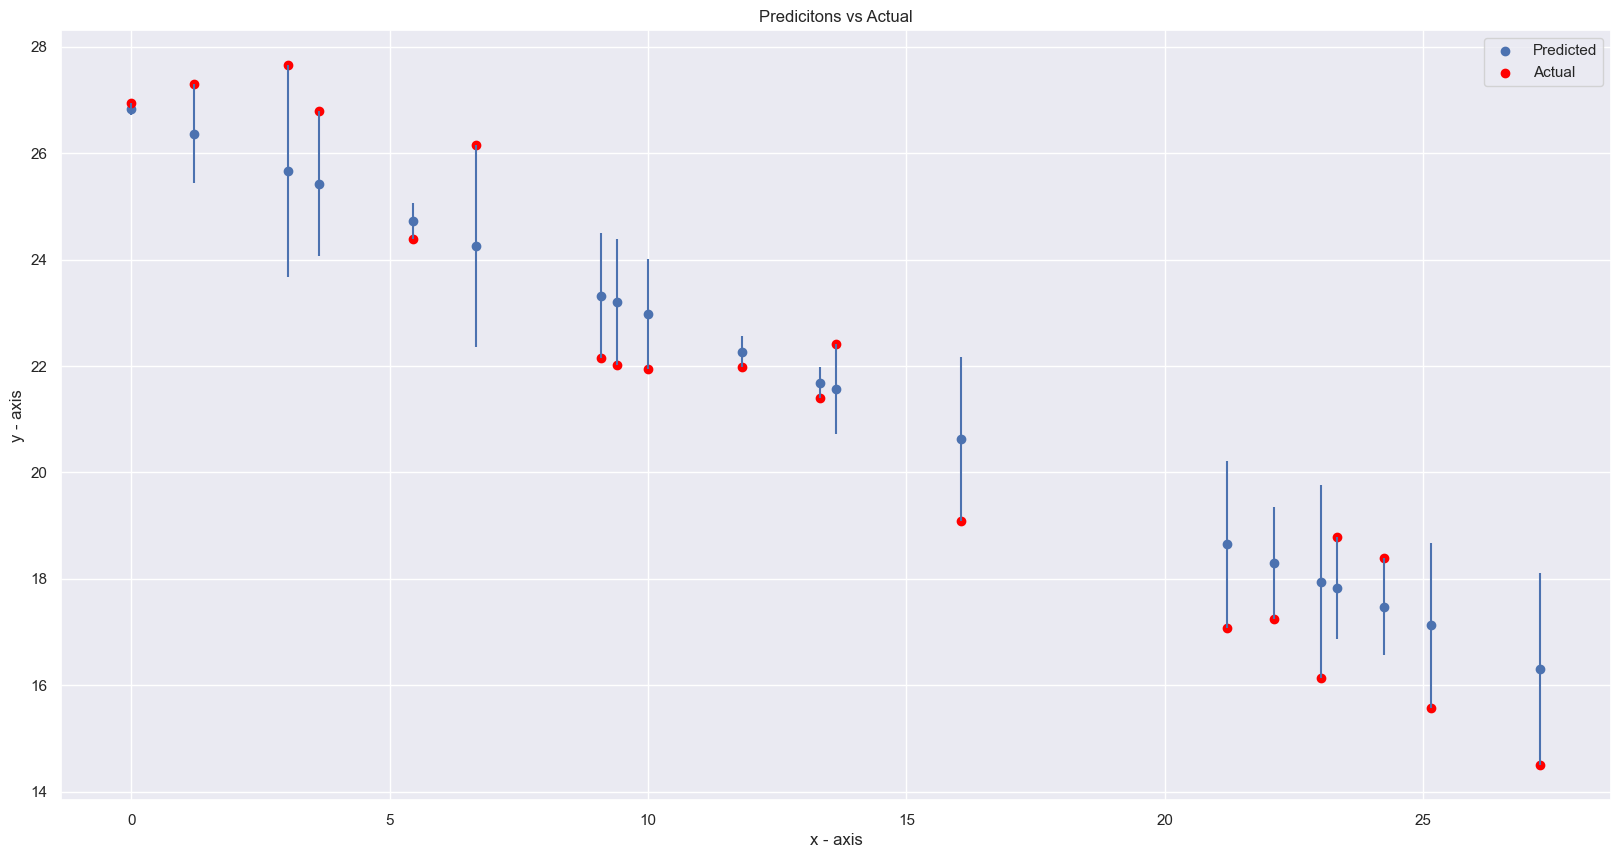

In [117]:
sns.set(rc={'figure.figsize':(20,10)})
plt.scatter(x_test, y_pred, label='Predicted', c='b')
plt.scatter(x_test, y_test, label='Actual', color='red')
plt.errorbar(x_test.iloc[:,0], y_pred.iloc[:,0], yerr = yerr, xerr= None, ls='none') 
plt.xlabel('x - axis')
plt.ylabel('y - axis')
plt.title('Predicitons vs Actual')
plt.legend()
plt.show()